In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['Настя'],
  ['Настя', 'Неизвестный', 'Чернуха'],
  ['Настя', 'Чернуха'],
  ['Настя'],
  ['Настя', 'Неизвестный'],
  ['Настя'],
  ['Настя', 'Смирновский'],
  ['Настя', 'Смирновский', 'Неизвестный']],
 [['Барон'],
  ['Барон', 'Камердинер'],
  ['Барон'],
  ['Барон', 'Смирновский'],
  ['Барон', 'Баронесса'],
  ['Баронесса'],
  ['Барон', 'Баронесса', 'Смирновский']],
 [['Барон', 'Климович'],
  ['Климович', 'Барон', 'Баронесса'],
  ['Баронесса'],
  ['Барон', 'Баронесса', 'Настя'],
  ['Барон', 'Баронесса', 'Настя', 'Смирновский', 'Слуга'],
  ['Смирновский', 'Настя'],
  ['Барон', 'Баронесса', 'Настя', 'Смирновский'],
  ['Баронесса', 'Смирновский']],
 [['Петрович', 'Елисей'],
  ['Смирновский', 'Петрович', 'Елисей'],
  ['Смирновский'],
  ['Смирновский', 'Чернуха'],
  ['Смирновский'],
  ['Смирновский', 'Баронесса', 'Климович'],
  ['Смирновский', 'Баронесса']],
 [['Настя', 'Чернуха'],
  ['Настя', 'Чернуха', 'Смирновский'],
  ['Настя', 'Чернуха', 'Смирновский', 'Горничная'],
  ['Смирновский'],
  ['Барон', 'Чернуха'],
  ['Барон', 'Чернуха', 'Смирновский', 'Настя'],
  ['Баронесса', 'Барон', 'Чернуха', 'Смирновский', 'Настя']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,II.1,II.2,II.3,II.4,II.5,II.6,II.7,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,V.1,V.2,V.3,V.4,V.5,V.6,V.7
Барон,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
Баронесса,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
Горничная,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Елисей,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Камердинер,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Климович,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Настя,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1
Неизвестный,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Петрович,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Слуга,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,5,пьеса
Барон,,0.17,0.57,,0,0.22
Баронесса,,0,0.29,0,0,0.22
Горничная,,,,,0.17,0.03
Елисей,,,,0,,0.03
Камердинер,,0.17,,,,0.03
Климович,,,0,0.17,,0.08
Настя,,,0.14,,0.17,0.14
Неизвестный,0.57,,,,,0.14
Петрович,,,,0,,0.03
Слуга,,,0.14,,,0.03


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.19


,1,2,3,4,5,6,7,8,действия
1,0.08,0.25,0.17,0.08,0.17,0.08,0.17,0.25,0.16
2,0.08,0.17,0.08,0.17,0.17,0.08,0.25,,0.14
3,0.17,0.25,0.08,0.25,0.42,0.17,0.33,0.17,0.23
4,0.17,0.25,0.08,0.17,0.08,0.25,0.17,,0.17
5,0.17,0.25,0.33,0.08,0.17,0.33,0.42,,0.25


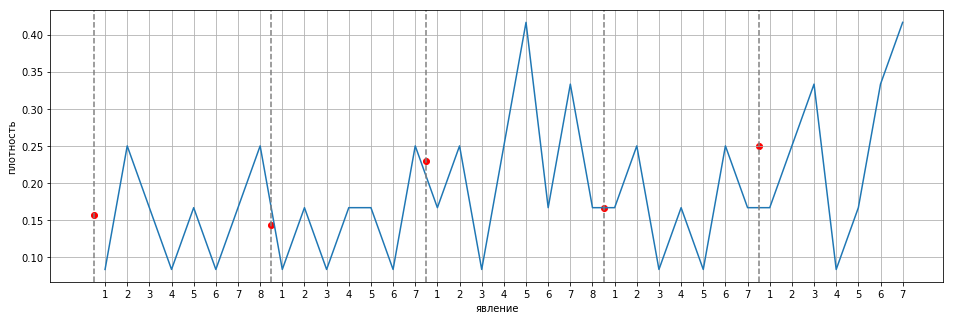

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

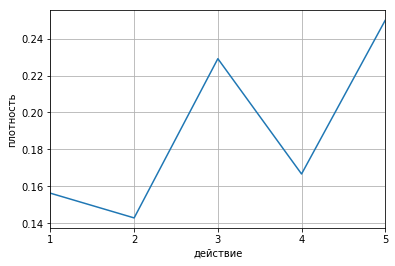

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1     2     3     4     5  пьеса
Барон       Баронесса          0.71  0.38        0.29   0.32
            Горничная                            0.57   0.41
            Елисей                                      0.43
            Камердинер         0.71                     0.35
            Климович                 0.38               0.35
            Настя                    0.38        0.57   0.57
            Неизвестный                                 0.46
            Петрович                                    0.43
            Слуга                     0.5               0.35
            Смирновский        0.57  0.62        0.57   0.57
            Чернуха                              0.43   0.46
Баронесса   Барон              0.71  0.38        0.29   0.32
            Горничная                            0.29   0.35
            Елисей                         0.57         0.38
            Камердинер         0.57                     0.35
            Климович                 0.75  0.14         0.30
            Настя                     0.5        0.57   0.57
            Неизвестный                                 0.41
            Петрович                       0.57         0.38
            Слуга                    0.62               0.30
            Смирновский        0.43   0.5  0.57  0.57   0.46
            Чернуха                        0.43  0.71   0.51
Горничная   Барон                                0.57   0.41
            Баронесса                            0.29   0.35
            Елисей                                      0.08
            Камердинер                                  0.05
            Климович                                    0.11
            Настя                                0.57   0.43
            Неизвестный                                 0.11
            Петрович                                    0.08
            Слуга                                       0.05
            Смирновский                          0.57   0.49
            Чернуха                              0.71   0.22
Елисей      Барон                                       0.43
            Баронесса                      0.57         0.38
            Горничная                                   0.08
            Камердинер                                  0.08
            Климович                       0.43         0.14
            Настя                                       0.51
            Неизвестный                                 0.14
            Петрович                          0         0.00
            Слуга                                       0.08
            Смирновский                    0.86         0.51
            Чернуха                        0.43         0.30
Камердинер  Барон              0.71                     0.35
            Баронесса          0.57                     0.35
            Горничная                                   0.05
            Елисей                                      0.08
            Климович                                    0.11
            Настя                                       0.49
            Неизвестный                                 0.11
            Петрович                                    0.08
            Слуга                                       0.05
            Смирновский        0.43                     0.54
            Чернуха                                     0.27
Климович    Барон                    0.38               0.35
            Баронесса                0.75  0.14         0.30
            Горничная                                   0.11
            Елисей                         0.43         0.14
            Камердинер                                  0.11
            Настя                    0.75               0.54
            Неизвестный                                 0.16
            Петрович                       0.43         0.14
            Слуга                    0.38               0.11
            Смирновский              0.75  0.71         0.54
  

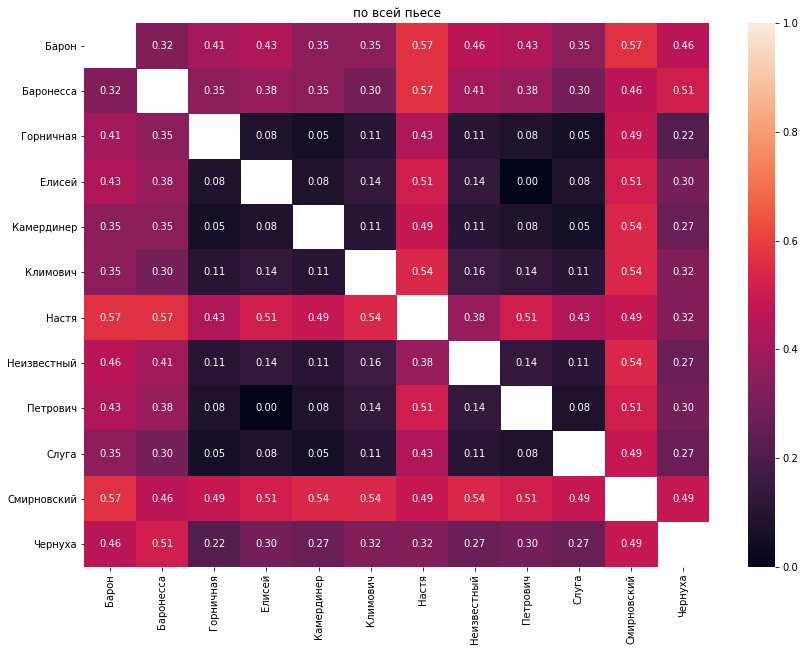

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

Елисей = Петрович


## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

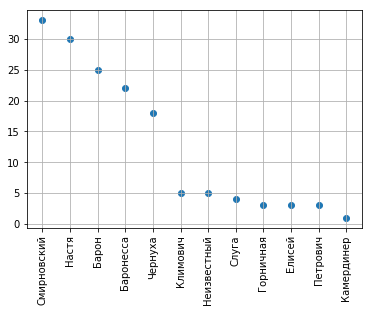

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,Смирновский,Настя,Барон,Баронесса,Чернуха,Климович,Неизвестный,Слуга,Горничная,Елисей,Петрович,Камердинер
ранг,33,30,25,22,18,5,5,4,3,3,3,1


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,5,пьеса
Смирновский,0.25,0.29,0.5,0.86,0.71,0.51
Настя,1,,0.5,,0.71,0.46
Барон,,0.86,0.62,,0.43,0.38
Баронесса,,0.43,0.75,0.29,0.14,0.32
Чернуха,0.25,,,0.14,0.86,0.24
Климович,,,0.25,0.14,,0.08
Неизвестный,0.38,,,,,0.08
Елисей,,,,0.29,,0.05
Петрович,,,,0.29,,0.05
Горничная,,,,,0.14,0.03


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,Барон,Баронесса,Горничная,Елисей,Камердинер,Климович,Настя,Неизвестный,Петрович,Слуга,Смирновский,Чернуха
Барон,,,,,,,0,0,,,0,0
Баронесса,,,,,,,0,0,,,0,0
Горничная,,,,,,,0,0,,,0,0
Елисей,,,,,,,0,0,,,0,0
Камердинер,,,,,,,0,0,,,0,0
Климович,,,,,,,0,0,,,0,0
Настя,,,,,,,,1,,,1,1
Неизвестный,,,,,,,0.38,,,,0.5,0.5
Петрович,,,,,,,0,0,,,0,0
Слуга,,,,,,,0,0,,,0,0


Действие 2


,Барон,Баронесса,Горничная,Елисей,Камердинер,Климович,Настя,Неизвестный,Петрович,Слуга,Смирновский,Чернуха
Барон,,0.67,,,1,,,,,,1,
Баронесса,0.33,,,,0,,,,,,0.5,
Горничная,0,0,,,0,,,,,,0,
Елисей,0,0,,,0,,,,,,0,
Камердинер,0.17,0,,,,,,,,,0,
Климович,0,0,,,0,,,,,,0,
Настя,0,0,,,0,,,,,,0,
Неизвестный,0,0,,,0,,,,,,0,
Петрович,0,0,,,0,,,,,,0,
Слуга,0,0,,,0,,,,,,0,


Действие 3


,Барон,Баронесса,Горничная,Елисей,Камердинер,Климович,Настя,Неизвестный,Петрович,Слуга,Смирновский,Чернуха
Барон,,0.67,,,,1,0.75,,,1,0.5,
Баронесса,0.8,,,,,0.5,0.75,,,1,0.75,
Горничная,0,0,,,,0,0,,,0,0,
Елисей,0,0,,,,0,0,,,0,0,
Камердинер,0,0,,,,0,0,,,0,0,
Климович,0.4,0.17,,,,,0,,,0,0,
Настя,0.6,0.5,,,,0,,,,1,0.75,
Неизвестный,0,0,,,,0,0,,,0,0,
Петрович,0,0,,,,0,0,,,0,0,
Слуга,0.2,0.17,,,,0,0.25,,,,0.25,


Действие 4


,Барон,Баронесса,Горничная,Елисей,Камердинер,Климович,Настя,Неизвестный,Петрович,Слуга,Смирновский,Чернуха
Барон,,0,,0,,0,,,0,,0,0
Баронесса,,,,0,,1,,,0,,0.33,0
Горничная,,0,,0,,0,,,0,,0,0
Елисей,,0,,,,0,,,1,,0.17,0
Камердинер,,0,,0,,0,,,0,,0,0
Климович,,0.5,,0,,,,,0,,0.17,0
Настя,,0,,0,,0,,,0,,0,0
Неизвестный,,0,,0,,0,,,0,,0,0
Петрович,,0,,1,,0,,,,,0.17,0
Слуга,,0,,0,,0,,,0,,0,0


Действие 5


,Барон,Баронесса,Горничная,Елисей,Камердинер,Климович,Настя,Неизвестный,Петрович,Слуга,Смирновский,Чернуха
Барон,,1,0,,,,0.4,,,,0.4,0.5
Баронесса,0.33,,0,,,,0.2,,,,0.2,0.17
Горничная,0,0,,,,,0.2,,,,0.2,0.17
Елисей,0,0,0,,,,0,,,,0,0
Камердинер,0,0,0,,,,0,,,,0,0
Климович,0,0,0,,,,0,,,,0,0
Настя,0.67,1,1,,,,,,,,0.8,0.83
Неизвестный,0,0,0,,,,0,,,,0,0
Петрович,0,0,0,,,,0,,,,0,0
Слуга,0,0,0,,,,0,,,,0,0


По всей пьесе


,Барон,Баронесса,Горничная,Елисей,Камердинер,Климович,Настя,Неизвестный,Петрович,Слуга,Смирновский,Чернуха
Барон,,0.58,0,0,1,0.67,0.29,0,0,1,0.32,0.33
Баронесса,0.5,,0,0,0,0.67,0.24,0,0,1,0.37,0.11
Горничная,0,0,,0,0,0,0.06,0,0,0,0.05,0.11
Елисей,0,0,0,,0,0,0,0,1,0,0.05,0
Камердинер,0.07,0,0,0,,0,0,0,0,0,0,0
Климович,0.14,0.17,0,0,0,,0,0,0,0,0.05,0
Настя,0.36,0.33,1,0,0,0,,1,0,1,0.47,0.78
Неизвестный,0,0,0,0,0,0,0.18,,0,0,0.05,0.11
Петрович,0,0,0,1,0,0,0,0,,0,0.05,0
Слуга,0.07,0.08,0,0,0,0,0.06,0,0,,0.05,0


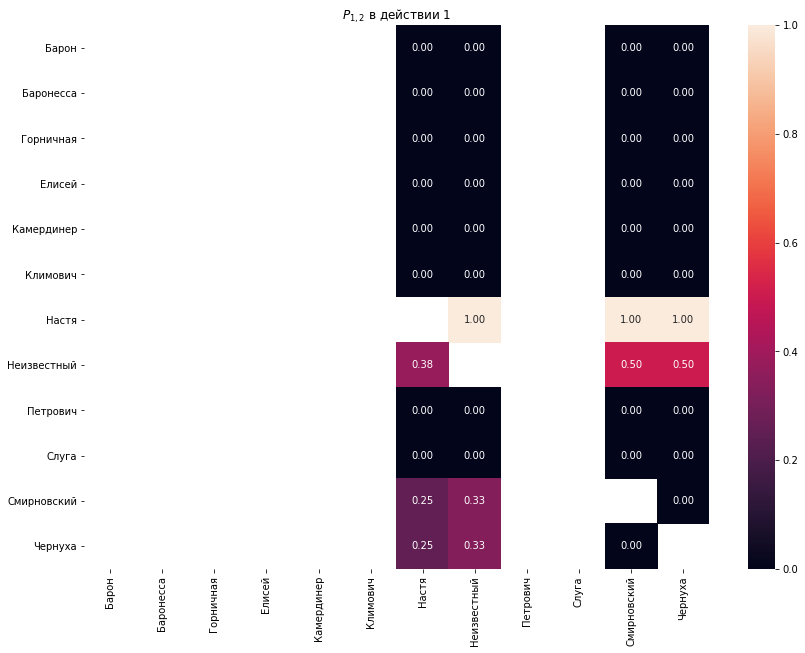

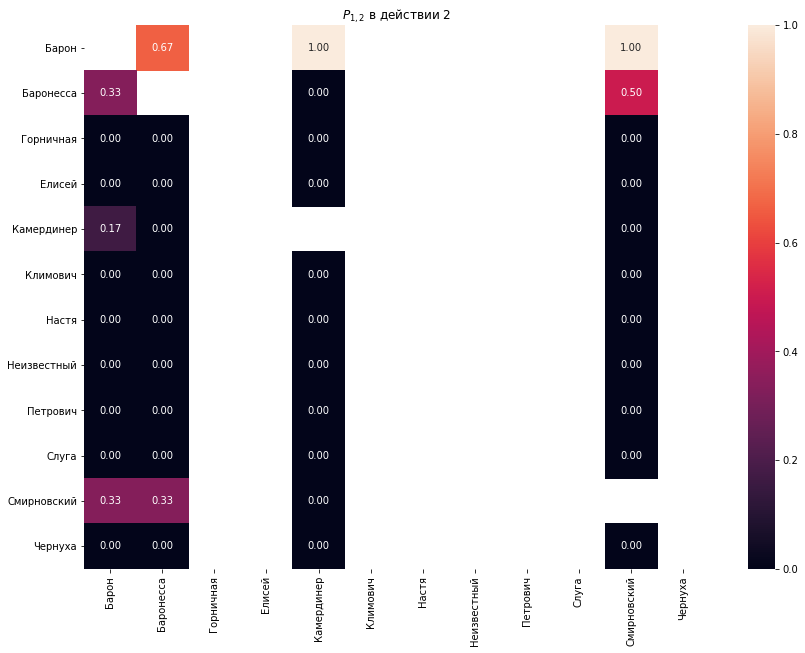

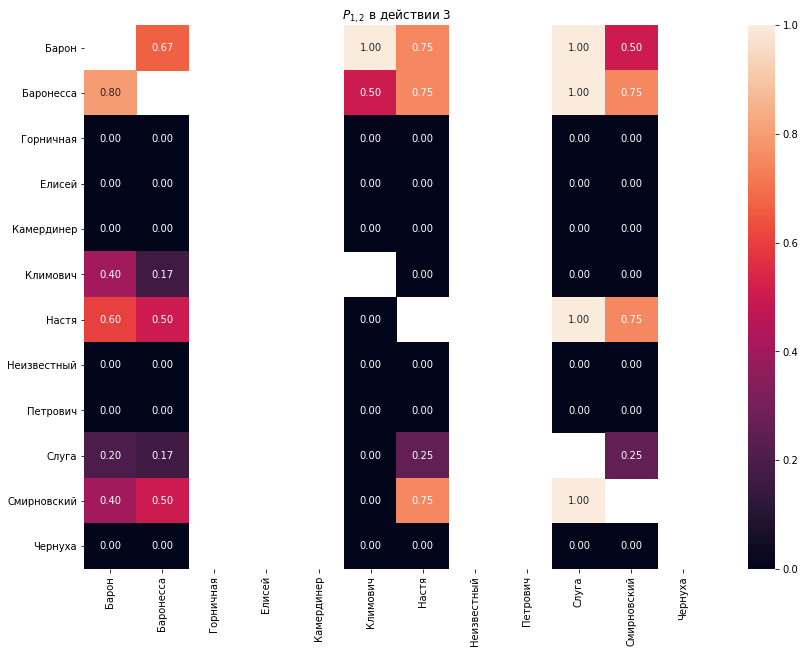

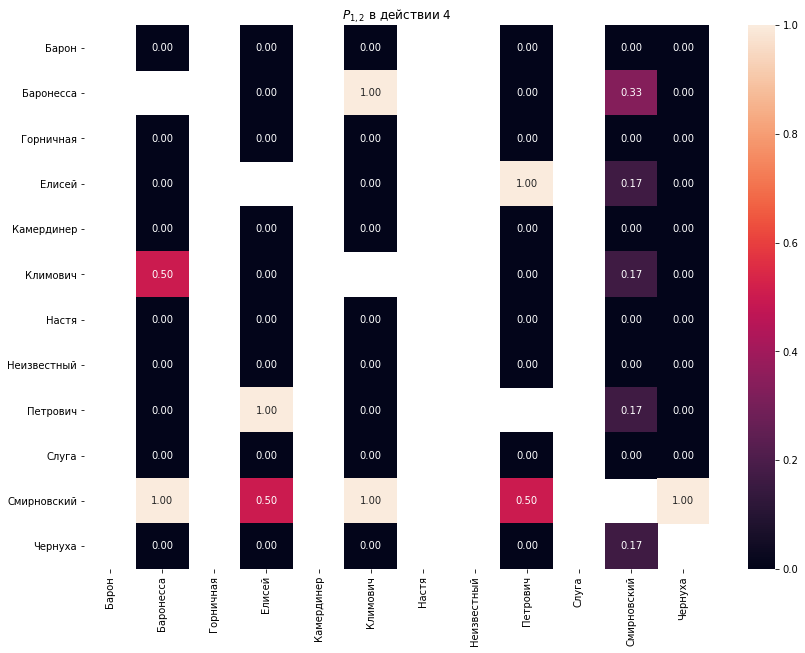

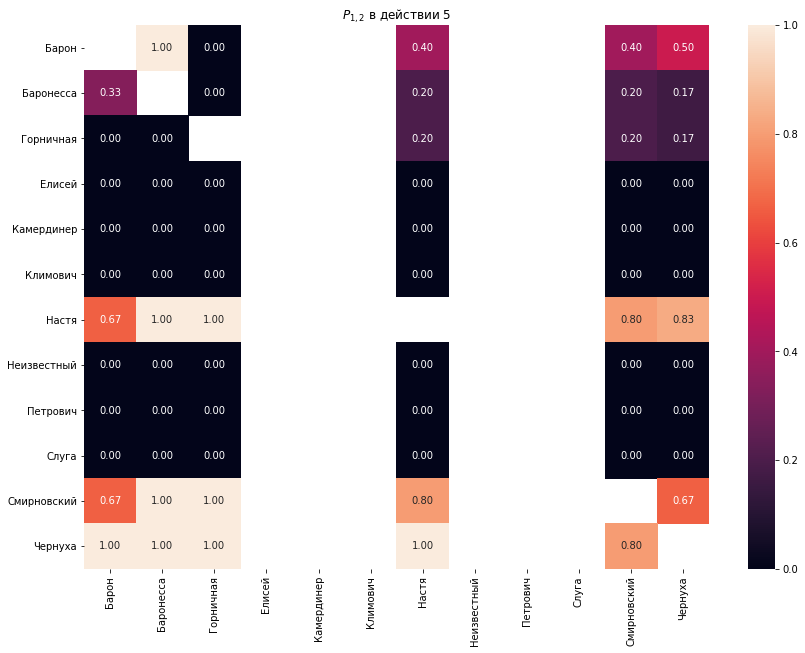

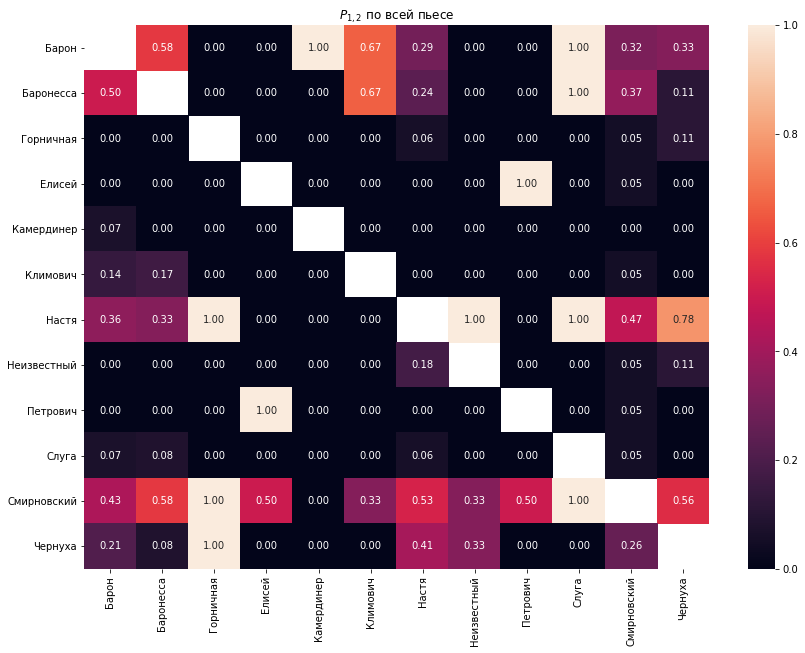

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

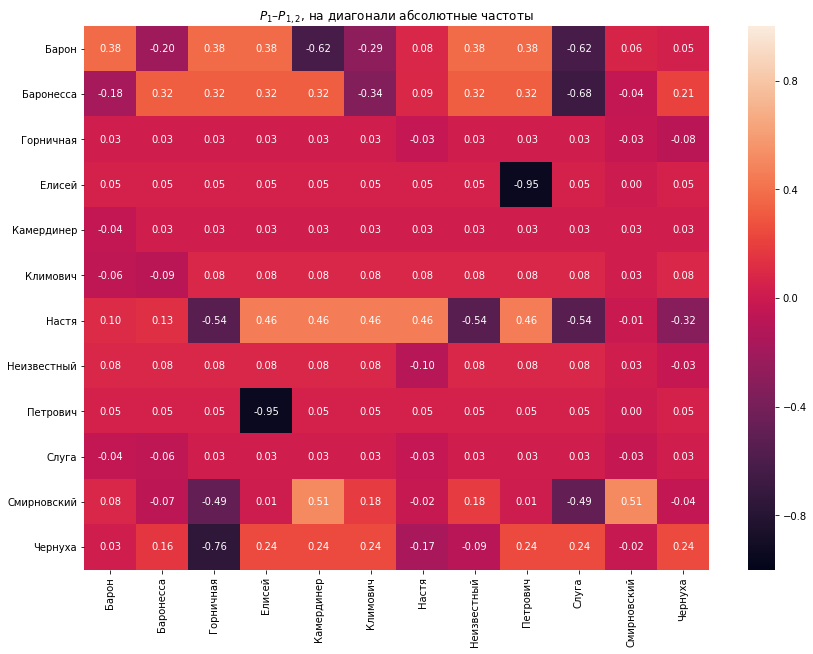

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");